In [1]:
import sys
sys.path.insert(0, '../')
import pandas as pd
from src.embeddings import get_embedding
from src.classifier import TextClassifier

In [2]:
# Load the test dataset
df = pd.read_csv('data/multiclass.csv')

# Extract text messages and labels
texts = list(df.text)
labels = list(df.label)

In [3]:
# Convert text messages to embeddings
embeddings = [get_embedding(text) for text in texts]


In [4]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, text_train, text_test = train_test_split(embeddings, labels, texts, test_size=0.3, random_state=42)

# Train and evaluate classifiers
classifiers = ['logistic', 'random_forest', 'svm']
best_f1 = 0
best_classifier = None

In [5]:
results = {}

for classifier_type in classifiers:
    result = {}

    print(f"\nTraining {classifier_type} classifier...")
    classifier = TextClassifier(model_type=classifier_type)
    classifier.train(X_train, y_train)

    print(f"\nEvaluating {classifier_type} classifier on test set:")
    classifier.evaluate(X_test, y_test)

    f1 = classifier.model.score(X_test, y_test)
    inference_time = classifier.measure_inference_time(X_train)
    size = classifier.get_model_size()

    result["f1"] = f1
    result["inference_time"] = inference_time
    result["size"] = size

    results[classifier_type] = result

    if f1 > best_f1:
        best_f1 = f1
        best_classifier = classifier


Training logistic classifier...
Best parameters: {'C': 5, 'penalty': 'l2'}
Best F1-score: 0.8554

Evaluating logistic classifier on test set:
Accuracy: 0.8889
F1-score: 0.8889
Confusion Matrix:
[[8 0 0 0]
 [0 2 1 0]
 [0 0 3 0]
 [0 1 0 3]]

Classification Report:
               precision    recall  f1-score   support

       animal       1.00      1.00      1.00         8
   historical       0.67      0.67      0.67         3
        space       0.75      1.00      0.86         3
technological       1.00      0.75      0.86         4

     accuracy                           0.89        18
    macro avg       0.85      0.85      0.85        18
 weighted avg       0.90      0.89      0.89        18


Training random_forest classifier...
Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-score: 0.6714

Evaluating random_forest classifier on test set:
Accuracy: 0.7778
F1-score: 0.7453
Confusion Matrix:
[[8 0 0 0]
 [0 2 1 0]
 [0 0 3 0]
 [1 2 0 1]]

Classi

c:\Users\mbass\OneDrive\Documents\01.Programming\01_python\20_text_eval\embeddings_classifier\venv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [6]:
results

{'logistic': {'f1': 0.8888888888888888,
  'inference_time': 0.002358419895172119,
  'size': 50076},
 'random_forest': {'f1': 0.7777777777777778,
  'inference_time': 0.005216317176818848,
  'size': 158848},
 'svm': {'f1': 1.0, 'inference_time': 0.0021570682525634765, 'size': 49967}}


Best classifier: svm
Best F1-score: 1.0000

Plotting learning curve for the best classifier...


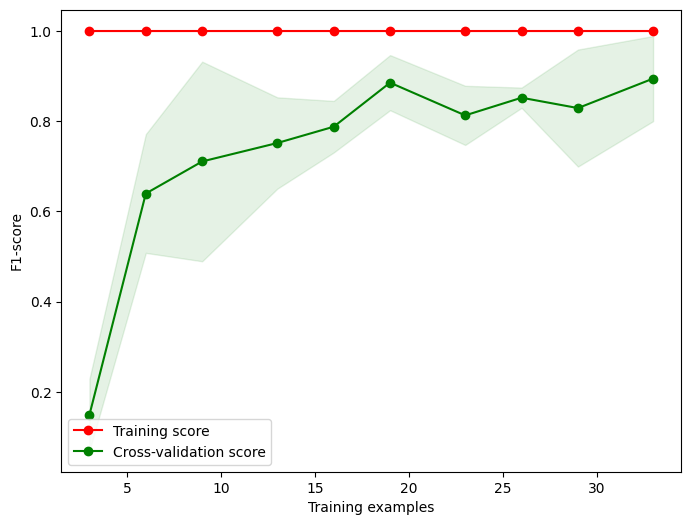

In [7]:
print(f"\nBest classifier: {best_classifier.model_type}")
print(f"Best F1-score: {best_f1:.4f}")

# Plot learning curve for the best classifier
print("\nPlotting learning curve for the best classifier...")
best_classifier.plot_learning_curve(X_train, y_train)

In [8]:
# Save the best classifier
model_path = 'best_classifier.pkl'
best_classifier.save_model(model_path)
print(f"\nSaved best classifier to {model_path}")


Saved best classifier to best_classifier.pkl
